# Using `qgpv_eqlat_lwa`

## Instructions

The python package "hn2016_falwa" contains a wrapper function named "qgpv_eqlat_lwa" that computes the finite-amplitude local wave activity (LWA) based on quasi-geostrophic potential vorticity (QGPV) field derived from Reanalysis data with spherical geometry. It differs from the function "barotropic_eqlat_lwa" that a hemispheric domain (instead of global domain) is used to compute both equivalent-latitude relationship and LWA. This is to avoid spurious large values of LWA near the equator arising from the small meridional gradient of QGPV there.

This sample code demonstrates how the function in this package can be used to reproduce plots of zonal wind, QGPV and LWA plots (Fig.8-9 in HN15) from QGPV fields.

## Contact

Please make inquiries and report issues via Github: https://github.com/csyhuang/hn2016_falwa/issues

In [1]:
from hn2016_falwa.wrapper import qgpv_eqlat_lwa # Module for plotting local wave activity (LWA) plots and 
                        # the corresponding equivalent-latitude profile
from math import pi
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

# --- Parameters --- #
Earth_radius = 6.378e+6 # Earth's radius

# --- Load the zonal wind and QGPV at 240hPa --- #
u_QGPV_File = Dataset('u_QGPV_240hPa_2012Oct28to31.nc', mode='r')

# --- Read in longitude and latitude arrays --- #
xlon = u_QGPV_File.variables['longitude'][:]
ylat = u_QGPV_File.variables['latitude'][:]
clat = np.abs(np.cos(ylat*pi/180.)) # cosine latitude
nlon = xlon.size
nlat = ylat.size

# --- Parameters needed to use the module HN2015_LWA --- #
dphi = (ylat[2]-ylat[1])*pi/180. # Equal spacing between latitude grid points, in radian
area = 2.*pi*Earth_radius**2 *(np.cos(ylat[:,np.newaxis]*pi/180.)*dphi)/float(nlon) * np.ones((nlat,nlon))
area = np.abs(area) # To make sure area element is always positive (given floating point errors). 

# --- Datestamp ---
Start_date = dt.datetime(2012, 10, 28, 0, 0)
delta_t = dt.timedelta(hours=24)
Datestamp = [Start_date + delta_t*tt for tt in range(4)]

# --- Read in the absolute vorticity field from the netCDF file --- #
u = u_QGPV_File.variables['U'][:]
QGPV = u_QGPV_File.variables['QGPV'][:]
u_QGPV_File.close()

# --- Set colorbar range for the 3 variables ---
u_caxis = np.arange(-44,89,11)
LWA_axis = np.linspace(0,313,11,endpoint=True)

/Users/claresyhuang/opt/anaconda3/envs/intel_cython/lib/python3.10/site-packages/numpy/ma/core.py:3222: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/claresyhuang/opt/anaconda3/envs/intel_cython/lib/python3.10/site-packages/mpl_toolkits/basemap/__init__.py:5133: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return npsel.concatenate((a,a[slicer]),axis=axis)
/Users/claresyhuang/opt/anaconda3/envs/intel_cython/lib/python3.10/site-packages/numpy/ma/core.py:3222: FutureWarning: Using a non-tuple sequence for multi

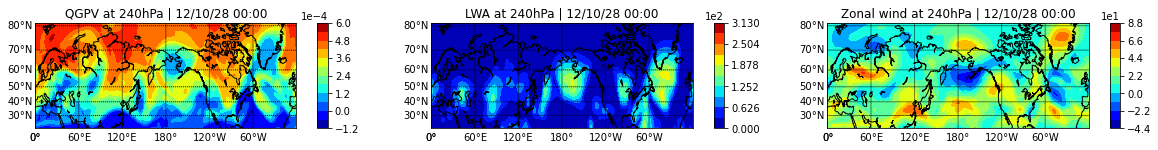

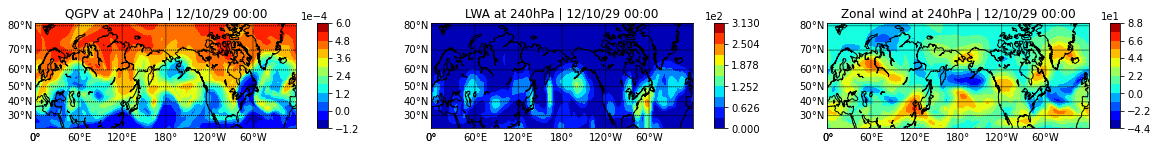

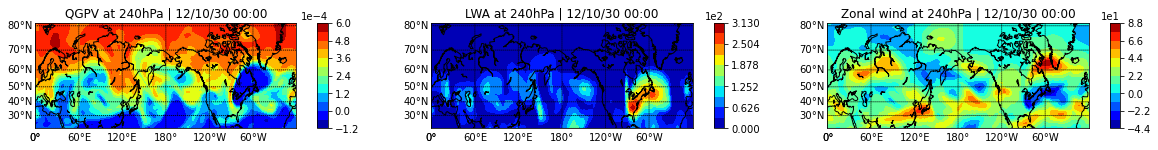

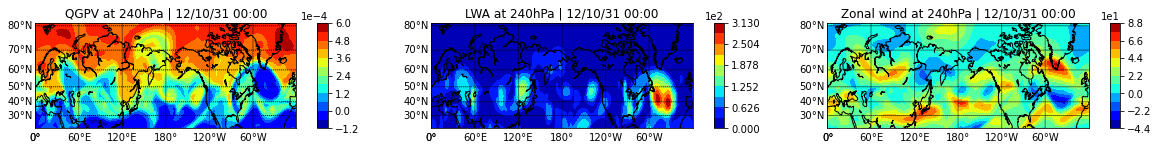

In [2]:
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

# --- Codes for plotting ---
for tt in range(4):
    Qref, LWA = qgpv_eqlat_lwa(ylat,QGPV[tt,0,:,:],area,Earth_radius*clat*dphi)

    fig = plt.figure(figsize=(16,2))

    ax = fig.add_subplot(131)
    ax.set_title('QGPV at 240hPa | '+Datestamp[tt].strftime("%y/%m/%d %H:%M"))
    m = Basemap(llcrnrlon=0,llcrnrlat=20.,urcrnrlon=360,urcrnrlat=81,fix_aspect=False,projection='mill')
    QGPV_plot, lons = addcyclic(QGPV[tt,0,:,:], xlon)
    lons, lats = np.meshgrid(lons, ylat) # find x,y of map projection grid.
    x, y = m(lons, lats)
    cs = m.contourf(x,y,QGPV_plot,11,cmap='jet')
    cb = m.colorbar(cs,"right",size="4%", pad='8%')
    cb.formatter.set_powerlimits((0, 0))
    cb.ax.yaxis.set_offset_position('right')                         
    cb.update_ticks()    
    m.drawcoastlines(linewidth=1.0)
    m.drawparallels(np.arange(-80,81,10),labels=[1,0,0,0])
    m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])

    ax = fig.add_subplot(132)
    ax.set_title("LWA at 240hPa | "+Datestamp[tt].strftime("%y/%m/%d %H:%M"))
    m = Basemap(llcrnrlon=0,llcrnrlat=20.,urcrnrlon=360,urcrnrlat=81,fix_aspect=False,projection='mill')
    LWA_plot, lons = addcyclic(LWA, xlon)
    lons, lats = np.meshgrid(lons, ylat) # find x,y of map projection grid.
    x, y = m(lons, lats)
    cs = m.contourf(x,y,LWA_plot,LWA_axis,cmap='jet')
    cb = m.colorbar(cs,"right",size="4%", pad='8%')
    cb.formatter.set_powerlimits((0, 0))
    m.drawcoastlines(linewidth=1.0)
    m.drawparallels(np.arange(-80,81,10),labels=[1,0,0,0])
    m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])

    ax = fig.add_subplot(133)
    ax.set_title("Zonal wind at 240hPa | "+Datestamp[tt].strftime("%y/%m/%d %H:%M"))
    m = Basemap(llcrnrlon=0,llcrnrlat=20.,urcrnrlon=360,urcrnrlat=81,fix_aspect=False,projection='mill')
    u_plot, lons = addcyclic(u[tt,0,:,:], xlon)
    lons, lats = np.meshgrid(lons, ylat) # find x,y of map projection grid.
    x, y = m(lons, lats)
    cs = m.contourf(x,y,u_plot,u_caxis,cmap='jet')
    cb = m.colorbar(cs,"right",size="4%", pad='8%')
    cb.formatter.set_powerlimits((0, 0))
    m.drawcoastlines(linewidth=1.0)
    m.drawparallels(np.arange(-80,81,10),labels=[1,0,0,0])
    m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
    
    plt.tight_layout(pad=0.4, w_pad=4.0, h_pad=2.0)
